# **Amazon Kindle Books Dataset - Data Cleaning, Analysis And Visualisation**

The dataset in this project contains the records for over 130,000 Kindle books available on Amazon. The data was originally collected in October 2023, and was subsequently made available on Kaggle. This dataset was collected from Kaggle on 21st April 2024. Here is the link for it: https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books.

### **Project Aim**
*   To clean, analyse and visualise the Amazon Kindle Books dataset.

### **Objectives**
This project answers the following questions:
*   How many books have had more than 10,000 reviews?
*   What are the 10 most expensive books on Amazon Kindle?
*   How many books are there for each category?

Visualisations are also created to get insights on the following:

*   The number of books in the 10 categories containing the highest number of them.
*   The frequency of ratings within different ranges.
*   The relationships between the number of stars, number of reviews and prices.

### **Metadata**

This dataset was created in October 2023. Here are the column descriptions:


*   **ASIN**  : this is a unique book ID assigned by Amazon.
*   **Title** : the title of the book.
*   **Author** : the author of the book.
*   **soldBy** : the seller of the book.
*   **imgURL** : the URL that shows an image of the book.
*   **productURL** : the URL that shows the description of the book.
*   **Stars** : the average star rating of a book.
*   **Reviews** : the number of reviews a book has received.
*   **Price** : the price of a book.
*   **isKindleUnlimited** : whether the book is available through Kindle Unlimited.
*   **category_id** : the ID for the book category.
*   **isBestSeller** : whether the book is a Best Seller.
*   **isEditorsPick** : whether the book is an Editor's Pick.
*   **isGoodReadsChoice** : whether the book is a Good Reads Choice.
*   **publishedDate** : the date the book was first published.
*   **category_name** : the category to which the book belongs to.

### **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing the dataset**

In [2]:
# Importing an Excel file.
df_dataset = pd.read_csv('amazon_kindle_books_dataset.csv')

Here is a statistical description of the numerical attributes :


In [3]:
df_dataset.describe()

,stars,reviews,price,category_id
count,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111
std,0.745646,5104.878777,22.254986,8.416924
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


The first few rows of the dataset.

In [4]:
# First few rows.
df_dataset.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,01/06/2015,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,15/02/2022,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,13/09/2022,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,25/02/2020,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,05/05/2015,Parenting & Relationships


### **Data Cleaning**

The duplicate records are removed based on duplicate asin numbers. This ensures that each asin number uniquely identifies one book entry.

In [5]:
# Removing rows with duplicate asin values.
df_dataset = df_dataset.drop_duplicates(subset=['asin'])

In [6]:
# As the number of records is still the same, 0 records were removed.
df_dataset

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,01/06/2015,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,15/02/2022,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,13/09/2022,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,25/02/2020,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,05/05/2015,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133097,B0C3SJDLK8,Anna Karenina,Leo Tolstoy,De Marque,https://m.media-amazon.com/images/I/61RXEyMctk...,https://www.amazon.com/dp/B0C3SJDLK8,4.7,0,0.00,False,29,True,False,False,15/09/2023,Nonfiction
133098,B09DW752Y1,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,Amazon.com Services LLC,https://m.media-amazon.com/images/I/71tjf6R-Wa...,https://www.amazon.com/dp/B09DW752Y1,4.4,0,9.99,False,29,False,False,False,30/09/2021,Nonfiction
133099,B0CFWHPJTN,The Count of Monte Cristo: The Original Unabri...,Alexandre Dumas,De Marque,https://m.media-amazon.com/images/I/71zcCb5Pvu...,https://www.amazon.com/dp/B0CFWHPJTN,4.8,0,1.99,False,29,True,False,False,15/09/2023,Nonfiction
133100,B0C1KMFXJC,War And Peace,Leo Tolstoy,De Marque,https://m.media-amazon.com/images/I/715QpZlzmi...,https://www.amazon.com/dp/B0C1KMFXJC,4.7,0,0.00,False,29,True,False,False,25/08/2023,Nonfiction


The following columns are removed as they are unwanted:
*   asin
*   imgUrl
*   productURL
*   isKindleUnlimited
*   category_id
*   isGoodReadsChoice
*   publishedDate.

In [7]:
# Removing unwanted columns
df_dataset = df_dataset.drop(columns=
 ['asin', 'imgUrl', 'productURL', 'isKindleUnlimited', 'category_id', 'isGoodReadsChoice', 'publishedDate'])

In [8]:
# The updated dataset with seven columns removed.
df_dataset.head()

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,True,False,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,False,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,True,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,False,True,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,False,Parenting & Relationships


Duplicate rows are now removed to make sure that each book entry only has one record.

In [9]:
df_dataset = df_dataset.drop_duplicates()

In [10]:
# The dataset with six rows removed.
df_dataset

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,True,False,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,False,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,True,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,False,True,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,False,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...
133097,Anna Karenina,Leo Tolstoy,De Marque,4.7,0,0.00,True,False,Nonfiction
133098,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,Amazon.com Services LLC,4.4,0,9.99,False,False,Nonfiction
133099,The Count of Monte Cristo: The Original Unabri...,Alexandre Dumas,De Marque,4.8,0,1.99,True,False,Nonfiction
133100,War And Peace,Leo Tolstoy,De Marque,4.7,0,0.00,True,False,Nonfiction


Now, empty cells, NA values and null values are removed.

In [11]:
# Removing rows with NA and null values, and empty cells.
df_dataset = df_dataset.dropna()
print(len(df_dataset))

123558


In [12]:
# Number of rows removed
rows_removed = 133096 - len(df_dataset)
print(rows_removed)

9538


The star ratings have to be between 0.0 and 5.0.

In [13]:
# There are no records with star ratings less than 0.0 or greater than 5.0.
df_dataset.loc[(df_dataset['stars'] > 5.0) | (df_dataset['stars'] < 0.0)]

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name


The reviews have to be a value of 0 or above.

In [14]:
# There are no records with reviews below 0.
df_dataset.loc[df_dataset['reviews'] < 0]

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name


Checking if all prices are above 0.00.

In [15]:
# There are no prices below 0.00.
df_dataset.loc[df_dataset['price'] < 0.00]

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name


In [16]:
# Statistical descriptions of dataset.
df_dataset.describe()

,stars,reviews,price
count,123558.000000,123558.000000,123558.000000
mean,4.394942,867.695714,15.784055
std,0.756127,4956.255694,22.882656
min,0.000000,0.000000,0.000000
25%,4.400000,0.000000,5.950000
50%,4.500000,10.000000,9.990000
75%,4.700000,381.000000,14.990000
max,5.000000,618227.000000,682.000000


### **Data Analysis**

Now that the data has been cleaned, it is time to analyse it.

**1. How many books have had more than 10,000 reviews?**

In [17]:
# Filtering the data.
filtered_data = df_dataset.query('reviews > 10000')

# Sorting the data in ascending order.
sorted_data = filtered_data.sort_values(by='reviews')
sorted_data

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name
32994,"Creativity, Inc. (The Expanded Edition): Overc...",Ed Catmull,Random House LLC,4.7,10002,13.99,False,False,Biographies & Memoirs
59347,Waybound (Cradle Book 12),Will Wight,Amazon.com Services LLC,4.8,10005,6.99,False,False,Science Fiction & Fantasy
43915,"One Summer: America, 1927",Bill Bryson,Random House LLC,4.4,10012,9.99,False,True,Politics & Social Sciences
47958,Eldest: Book II (The Inheritance Cycle 2),Christopher Paolini,Random House LLC,4.7,10018,10.99,False,False,Teen & Young Adult
49407,Tell the Wolves I'm Home: A Novel,Carol Rifka Brunt,Random House LLC,4.3,10019,13.99,False,True,Teen & Young Adult
...,...,...,...,...,...,...,...,...,...
28654,The Midnight Library: A Novel,Matt Haig,Penguin Group (USA) LLC,4.3,234933,13.99,False,True,Literature & Fiction
28634,Reminders of Him: A Novel,Colleen Hoover,Amazon.com Services LLC,4.7,242575,5.99,False,True,Literature & Fiction
28641,The Nightingale: A Novel,Kristin Hannah,Macmillan,4.7,289251,11.99,False,True,Literature & Fiction
28628,It Ends with Us: A Novel,Colleen Hoover,Simon and Schuster Digital Sales Inc,4.7,296710,11.99,False,False,Literature & Fiction


In [18]:
print(f'There are {len(sorted_data)} books with more than 10,000 reviews.')
print(f'The book with the most reviews is {sorted_data.title.iloc[-1]}, which has {sorted_data.reviews.iloc[-1]} reviews.\nIt was written by {sorted_data.author.iloc[-1]}.')

There are 1834 books with more than 10,000 reviews.
The book with the most reviews is Where the Crawdads Sing, which has 618227 reviews.
It was written by Delia Owens.


**2. What are the 10 most expensive books on Amazon Kindle?**

In [19]:
df_dataset.head()

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,True,False,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,False,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,True,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,False,True,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,False,Parenting & Relationships


In [30]:
# Sorting the 10 most expensive books by descending order.
descending_prices = df_dataset.sort_values(by=['price'], ascending=False)
top_10 = descending_prices.iloc[0:9]
top_10

,title,author,soldBy,stars,reviews,price,isBestSeller,isEditorsPick,category_name
123336,Drugs in Litigation: Damage Awards Involving P...,LexisNexis Editorial Staff,Amazon.com Services LLC,0.0,0,682.00,False,False,Law
125981,Broker-Dealer Regulation,Clifford E. Kirsch,Amazon.com Services LLC,0.0,0,662.00,False,False,Law
15712,Youmans and Winn Neurological Surgery E-Book: ...,H. Richard Winn,Amazon.com Services LLC,4.1,0,636.99,False,False,Science & Math
123725,How to Write a Patent Application,Jeffrey G. Sheldon,Amazon.com Services LLC,3.5,0,629.00,False,False,Law
113257,The Collected Works of C. G. Jung: Revised and...,C. G. Jung,Amazon.com Services LLC,0.0,0,549.99,False,False,"Health, Fitness & Dieting"
117647,"The Art of Aesthetic Surgery, Three Volume Set...",Foad Nahai,Amazon.com Services LLC,4.0,0,543.99,False,False,Medical
117177,"Perforator Flaps: Anatomy, Technique, & Clinic...",Phillip N. Blondeel,Amazon.com Services LLC,4.5,0,481.49,False,False,Medical
124945,International Commercial Arbitration: Three Vo...,Gary B. Born,Amazon.com Services LLC,3.2,0,480.00,False,False,Law
124152,LexisNexis Practice Guide: Florida Personal In...,Ervin A. Gonzalez,Amazon.com Services LLC,4.0,0,465.99,False,False,Law


In [21]:
most_expensive_book = top_10.iloc[0]
print(f'The most expensive book is {most_expensive_book[0]} written by {most_expensive_book[1]}.\nIt costs ${most_expensive_book[5]}.')

The most expensive book is Drugs in Litigation: Damage Awards Involving Prescription and Nonprescription Drugs 2023 Edition written by LexisNexis Editorial Staff.
It costs $682.0.


**3. How many books are there for each category?**

In [22]:
# Number of books for each category in descending order.
book_count_per_category = df_dataset.groupby('category_name').agg('count').title
print(book_count_per_category.sort_values(ascending=False))

category_name
Mystery, Thriller & Suspense    6224
Engineering & Transportation    6053
Science & Math                  5880
Parenting & Relationships       5702
Teen & Young Adult              5613
LGBTQ+ eBooks                   5468
Computers & Technology          5442
Crafts, Hobbies & Home          5427
Biographies & Memoirs           5355
Travel                          5317
Cookbooks, Food & Wine          5267
Law                             4965
Education & Teaching            4942
Religion & Spirituality         4938
Arts & Photo graphy             4862
Politics & Social Sciences      4118
Literature & Fiction            4112
Science Fiction & Fantasy       3954
Humor & Entertainment           3951
Foreign Language                3877
Self-Help                       3422
Reference                       3297
Sports & Outdoors               3144
Business & Money                2563
Medical                         2554
Romance                         2194
History                 

### **Data Visualisations**

The data is now visualised using bar charts, histograms and pair plots.

**The ten categories with the highest number of books**

In [23]:
# Converting "Book Count Per Category" to list to make it easier to process in matplotlib.

# Creating a Series with the category names as the indexes.
sorted_df = book_count_per_category.sort_values(ascending=False)
categories = sorted_df.index

# Creating an array of categories.
categories = categories.to_list()
print("List of categories : ")
print(categories)

List of categories : 
['Mystery, Thriller & Suspense', 'Engineering & Transportation', 'Science & Math', 'Parenting & Relationships', 'Teen & Young Adult', 'LGBTQ+ eBooks', 'Computers & Technology', 'Crafts, Hobbies & Home', 'Biographies & Memoirs', 'Travel', 'Cookbooks, Food & Wine', 'Law', 'Education & Teaching', 'Religion & Spirituality', 'Arts & Photo graphy', 'Politics & Social Sciences', 'Literature & Fiction', 'Science Fiction & Fantasy', 'Humor & Entertainment', 'Foreign Language', 'Self-Help', 'Reference', 'Sports & Outdoors', 'Business & Money', 'Medical', 'Romance', 'History', 'Health, Fitness & Dieting', 'Nonfiction', 'Comics']


In [24]:
# Creating a list with the category counts.
counts = book_count_per_category.sort_values(ascending=False).to_list()
print(counts)

[6224, 6053, 5880, 5702, 5613, 5468, 5442, 5427, 5355, 5317, 5267, 4965, 4942, 4938, 4862, 4118, 4112, 3954, 3951, 3877, 3422, 3297, 3144, 2563, 2554, 2194, 2014, 1551, 888, 464]


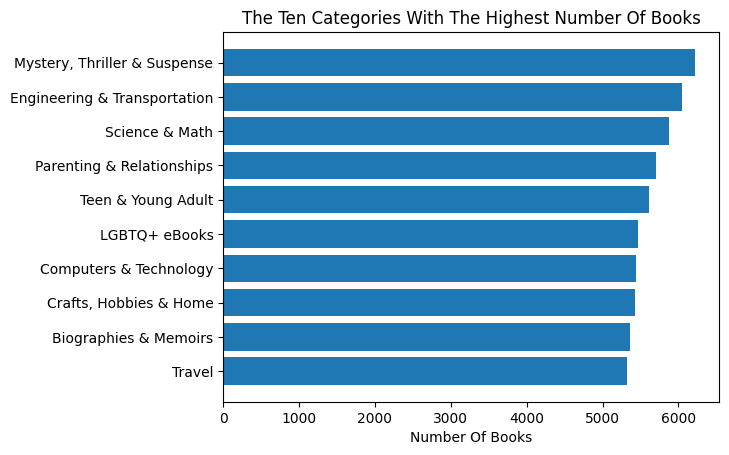

In [25]:
# Plotting a horizontal bar chart.
fig, ax = plt.subplots()

y_pos = np.arange(len(categories[0:10]))

ax.barh(y_pos, counts[0:10], align='center')
ax.set_yticks(y_pos, labels=categories[0:10])
ax.invert_yaxis()
ax.set_xlabel('Number Of Books')
ax.set_title('The Ten Categories With The Highest Number Of Books')

plt.show()

**The frequency of ratings within different ranges**

There are almost 120,000 books with a star rating of 4.0-5.0 stars.

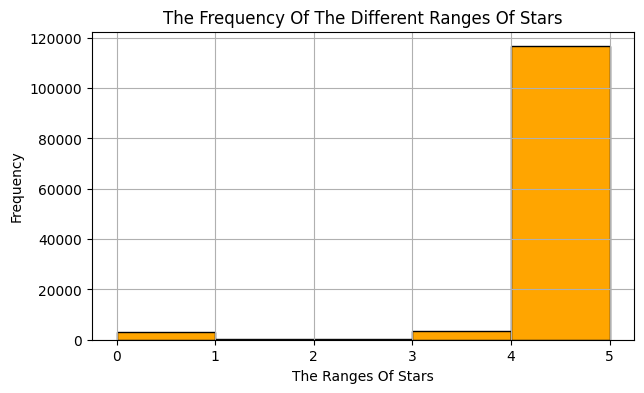

In [26]:
# A histogram to show the frequency of ratings (stars) for different ranges.
plt.figure(figsize=(7,4))
plt.hist(x=df_dataset.stars, bins=5, edgecolor='black', color='orange')
plt.xlabel('The Ranges Of Stars')
plt.ylabel('Frequency')
plt.title('The Frequency Of The Different Ranges Of Stars')
plt.grid(True)
plt.show()

**Showing the relationships between the number of stars, number of reviews and prices through pair plots**

The pair plots reveal the following:

*   the price of a book is not correlated with the number of stars (rating)
*   the lower the price of a book, the more reviews it will have
*   as the rating goes up, the number of reviews a book receives goes up.

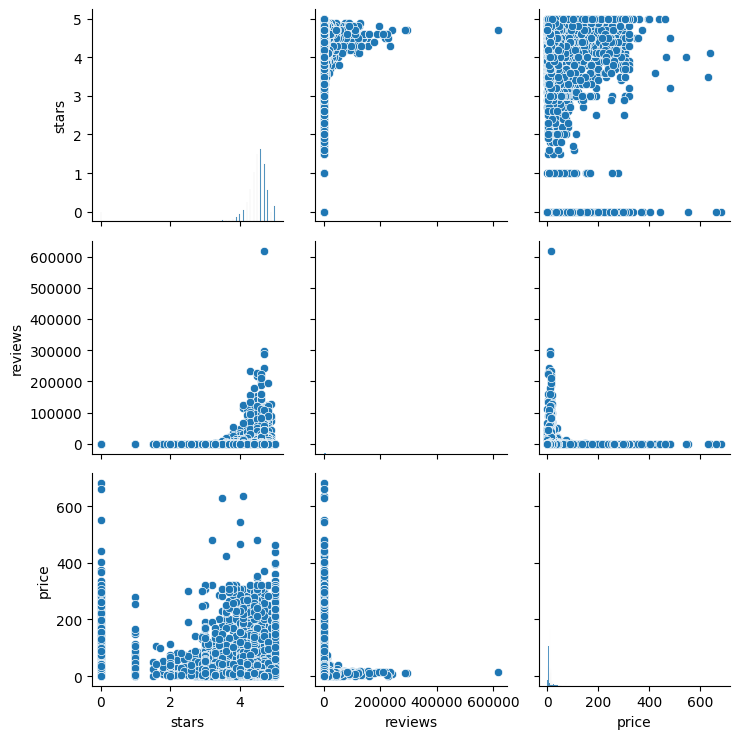

In [29]:
# Plotting pair plots
sns.pairplot(df_dataset,
             x_vars=['stars', 'reviews', 'price'],
             y_vars=['stars', 'reviews', 'price'])
plt.tight_layout()
plt.show()